**Table of contents**<a id='toc0_'></a>
- [CONFIG](#toc1_)    
- [Import libraries](#toc2_)
- [COLAB](#toc1_)    
- [Load data](#toc3_)    
- [Check class balancing](#toc4_)    
- [Image Data Generators](#toc5_)    
- [Simple](#toc6_)    
  - [Build & Compile](#toc6_1_)    
  - [Train](#toc6_2_)    
  - [Test](#toc6_3_)    
  - [Confusion Matrix](#toc6_4_)    
- [ResNet-18](#toc7_)    
  - [Build & Compile](#toc7_1_)    
  - [Train](#toc7_2_)    
  - [Test](#toc7_3_)    
  - [Confusion Matrix](#toc7_4_)    
- [Graphs](#toc8_)    
  - [Epochs vs Loss](#toc8_1_)    
  - [Epochs vs Accuracy](#toc8_2_)    
    - [Accuracy](#toc8_2_1_)    
    - [Total](#toc8_2_2_)    
    - [By Class](#toc8_2_3_)    
      - [Simple](#toc8_2_3_1_)    
        - [Class wise accuracy](#toc8_2_3_1_1_)    
        - [Top 10 most and least accurate classes](#toc8_2_3_1_2_)    
      - [ResNet](#toc8_2_3_2_)    
        - [Class wise accuracy](#toc8_2_3_2_1_)    
        - [Top 10 most and least accurate classes](#toc8_2_3_2_2_)    
- [Predictions](#toc9_)    
  - [Simple](#toc9_1_)    
  - [ResNet](#toc9_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[COLAB](#toc0_)


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!wget https://www.dropbox.com/s/ut350iwgby9swk2/Sketch_EITZ.zip
!unzip -qq /content/Sketch_EITZ
!rm /content/Sketch_EITZ.zip

--2023-08-31 03:44:31--  https://www.dropbox.com/s/ut350iwgby9swk2/Sketch_EITZ.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ut350iwgby9swk2/Sketch_EITZ.zip [following]
--2023-08-31 03:44:32--  https://www.dropbox.com/s/raw/ut350iwgby9swk2/Sketch_EITZ.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc34be84b669c9875778ee3b79.dl.dropboxusercontent.com/cd/0/inline/CC1XuY-izZJ-ioHmTuuHossbn44rBBdDSoFSWUOIlZjyVGLg9XP8BZuxTYM2ZBLFqJ1ufMzZXSC63ZRxID91HHko2BPSqAR1uRiBGteTmJPAfKY06InWvMGTO4peX3Im8WMcZXZH7C0Krxb91wMHBd2h/file# [following]
--2023-08-31 03:44:32--  https://ucbc34be84b669c9875778ee3b79.dl.dropboxusercontent.com/cd/0/inline/CC1XuY-izZJ-ioHmTuuHossbn44rBBdDSoFSWUOIlZjyVGLg9XP8BZuxTYM2ZBLFqJ1ufMzZXSC63ZRxID91HHko2B

In [33]:
!wget -nc https://raw.githubusercontent.com/jmsaavedrar/machine_learning/6c27f6972f17af0542cfa028857a1d37225053a6/convnet/simple.py
!wget -nc https://raw.githubusercontent.com/jmsaavedrar/machine_learning/315e175a2d88bca7aa9177a516183cbaf96a46c8/convnet/resnet.py
!gdown 1Es6pEoLc3vNdaEcYfxNXqW5L8G9ALCtb

File ‘simple.py’ already there; not retrieving.

File ‘resnet.py’ already there; not retrieving.

Downloading...
From: https://drive.google.com/uc?id=1Es6pEoLc3vNdaEcYfxNXqW5L8G9ALCtb
To: /content/metrics.py
100% 1.50k/1.50k [00:00<00:00, 8.54MB/s]


# <a id='toc1_'></a>[CONFIG](#toc0_)


In [34]:
DATA_PATH = "Sketch_EITZ"
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64
NUM_CLASSES = 250
EPOCHS = 50

# <a id='toc2_'></a>[Import libraries](#toc0_)


In [35]:
import os
import pandas as pd

import tensorflow as tf
import numpy as np
import simple as simple
import resnet as resnet
import metrics as metrics
import matplotlib.pyplot as plt

# <a id='toc3_'></a>[Load data](#toc0_)


In [36]:
file_path = os.path.join(DATA_PATH, "train.txt")
test_path = os.path.join(DATA_PATH, "test.txt")
mapping_path = os.path.join(DATA_PATH, "mapping.txt")

df = pd.read_csv(file_path, names=["images", "labels"], sep="\t")
df_test = pd.read_csv(test_path, names=["images", "labels"], sep="\t")

classes = pd.read_csv(mapping_path, names=["class", "idx"], sep="\t").to_dict(
    orient="dict"
)["class"]

df["labels"] = df["labels"].map(classes)
df["images"] = df["images"].map(lambda x: os.path.join(DATA_PATH, x))

df_test["labels"] = df_test["labels"].map(classes)
df_test["images"] = df_test["images"].map(lambda x: os.path.join(DATA_PATH, x))

# <a id='toc4_'></a>[Check class balancing](#toc0_)

Podemos ver que la diferencia entre la con más y menos imagenes no es muy grande, por lo que no es necesario hacer un balanceo de clases.


bell             74
lighter          72
socks            71
blimp            71
standing_bird    71
                 ..
submarine        56
palm_tree        56
octopus          55
brain            55
grapes           54
Name: labels, Length: 250, dtype: int64


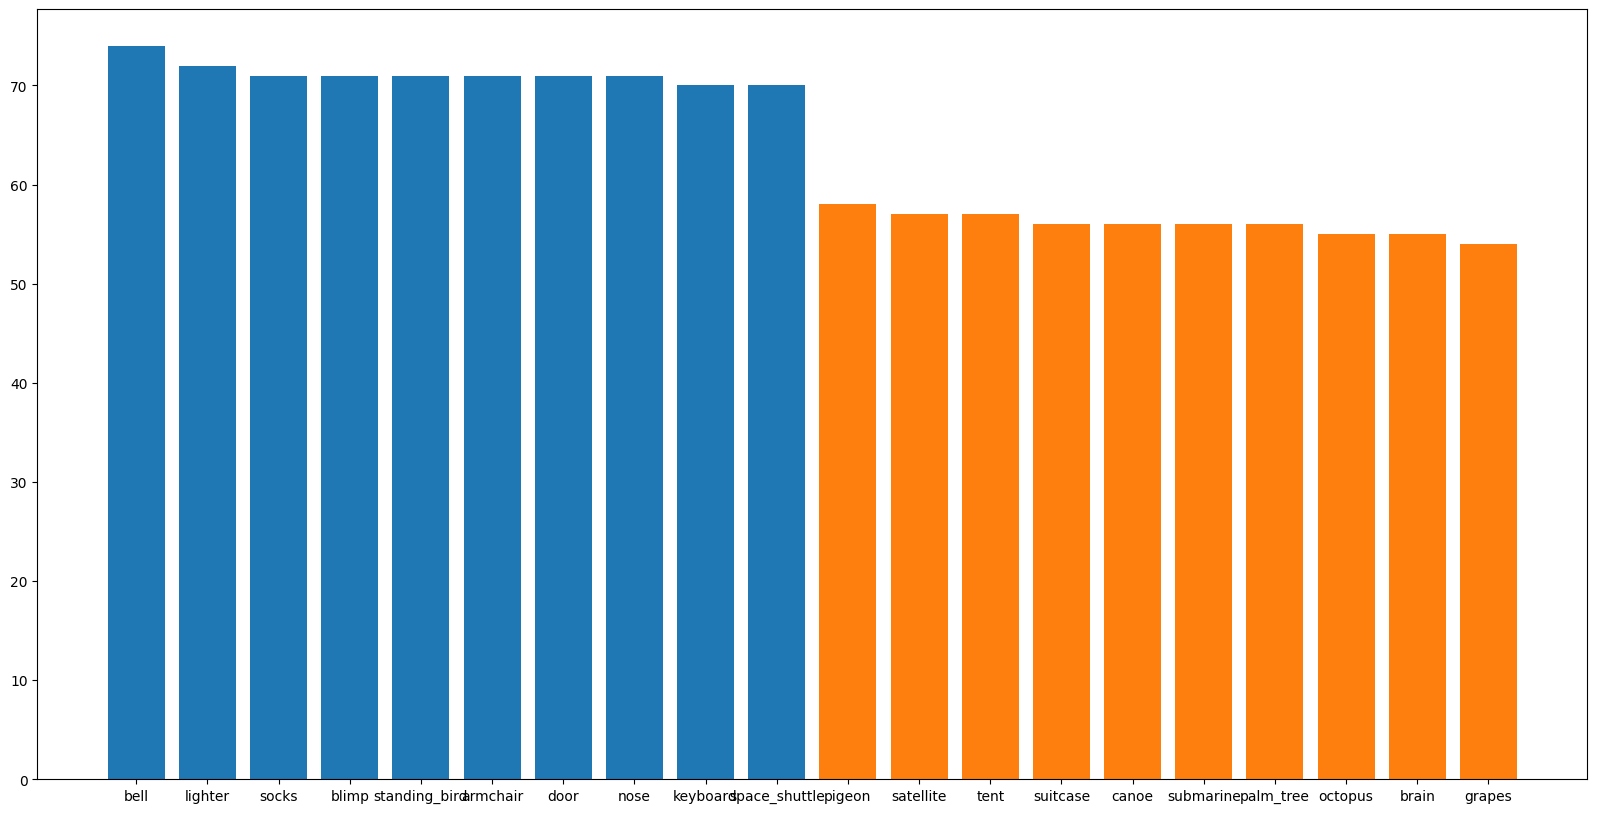

In [37]:
class_counts = df["labels"].value_counts()
print(class_counts)
plt.figure(figsize=(20, 10))
plt.bar(class_counts.index[:10], class_counts.values[:10])
plt.bar(class_counts.index[-10:], class_counts.values[-10:])
plt.show()


# <a id='toc5_'></a>[Image Data Generators](#toc0_)


In [38]:
datagen_kwargs = dict(rescale=1.0 / 255, validation_split=0.20)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

train_generator = train_datagen.flow_from_dataframe(
    df,
    x_col="images",
    y_col="labels",
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=None,
    subset="training",
    classes=list(classes.values()),  # explicitly specify the order of classes
)

validation_generator = train_datagen.flow_from_dataframe(
    df,
    x_col="images",
    y_col="labels",
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=None,
    subset="validation",
    classes=list(classes.values()),  # explicitly specify the order of classes
)

Found 12800 validated image filenames belonging to 250 classes.
Found 3200 validated image filenames belonging to 250 classes.


# <a id='toc6_'></a>[Simple](#toc0_)


## <a id='toc6_1_'></a>[Build & Compile](#toc0_)


In [39]:
model_simple = simple.SimpleModel(NUM_CLASSES)

shape_data = train_generator[0][0].shape[1:]
model_simple = model_simple.model(shape_data)

model_simple.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=[tf.keras.metrics.CategoricalAccuracy()],
)
model_simple.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 128, 128, 32  320         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_3 (BatchNo  (None, 128, 128, 32  128        ['conv1[0][0]']                  
 rmalization)                   )                                                           

## <a id='toc6_2_'></a>[Train](#toc0_)


In [40]:
history_simple = model_simple.fit(
    train_generator, epochs=EPOCHS, validation_data=validation_generator
)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


200/200 [==============================] - 32s 124ms/step - loss: 3.9797 - categorical_accuracy: 0.2184 - val_loss: 4.9014 - val_categorical_accuracy: 0.0359
Epoch 2/50
200/200 [==============================] - 17s 87ms/step - loss: 2.3242 - categorical_accuracy: 0.5116 - val_loss: 3.4631 - val_categorical_accuracy: 0.2669
Epoch 3/50
200/200 [==============================] - 18s 88ms/step - loss: 1.2898 - categorical_accuracy: 0.7437 - val_loss: 3.1823 - val_categorical_accuracy: 0.3113
Epoch 4/50
200/200 [==============================] - 17s 85ms/step - loss: 0.3884 - categorical_accuracy: 0.9553 - val_loss: 2.8813 - val_categorical_accuracy: 0.3581
Epoch 5/50
200/200 [==============================] - 17s 85ms/step - loss: 0.0625 - categorical_accuracy: 0.9982 - val_loss: 2.7050 - val_categorical_accuracy: 0.4056
Epoch 6/50
200/200 [==============================] - 16s 81ms/step - loss: 0.0157 - categorical_accuracy: 0.9999 - val_loss: 2.4598 - val_categorical_accuracy: 0.4506
Ep

## <a id='toc6_3_'></a>[Test](#toc0_)


In [41]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

test_generator = train_datagen.flow_from_dataframe(
    df_test,
    x_col="images",
    y_col="labels",
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=None,
    subset="training",
    classes=list(classes.values()),  # explicitly specify the order of classes
)

Found 3200 validated image filenames belonging to 250 classes.


## <a id='toc6_4_'></a>[Confusion Matrix](#toc0_)


In [42]:
# prediction using directly the trained model
# there is also a function called -- predict -- , you can check it
mc_simple = 0
for batch in range(len(test_generator)):
    imgs = test_generator[batch][0]

    y_true = test_generator[batch][1]
    y_pred = model_simple(imgs, training=False)

    # computing confusion_matrix
    mc_simple += metrics.confusion_matrix(y_true, y_pred, NUM_CLASSES)

print(mc_simple)
# mc as percentages
rmc = mc_simple.astype(np.float32) / np.sum(mc_simple, axis=1, keepdims=True)
rmc = (rmc * 100).astype(np.int32) / 100

print(rmc)


[[ 4  0  0 ...  0  0  0]
 [ 0  8  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ... 12  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  1  3]]
[[0.36 0.   0.   ... 0.   0.   0.  ]
 [0.   0.72 0.   ... 0.   0.   0.  ]
 [0.   0.   0.5  ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.57 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.05 0.17]]


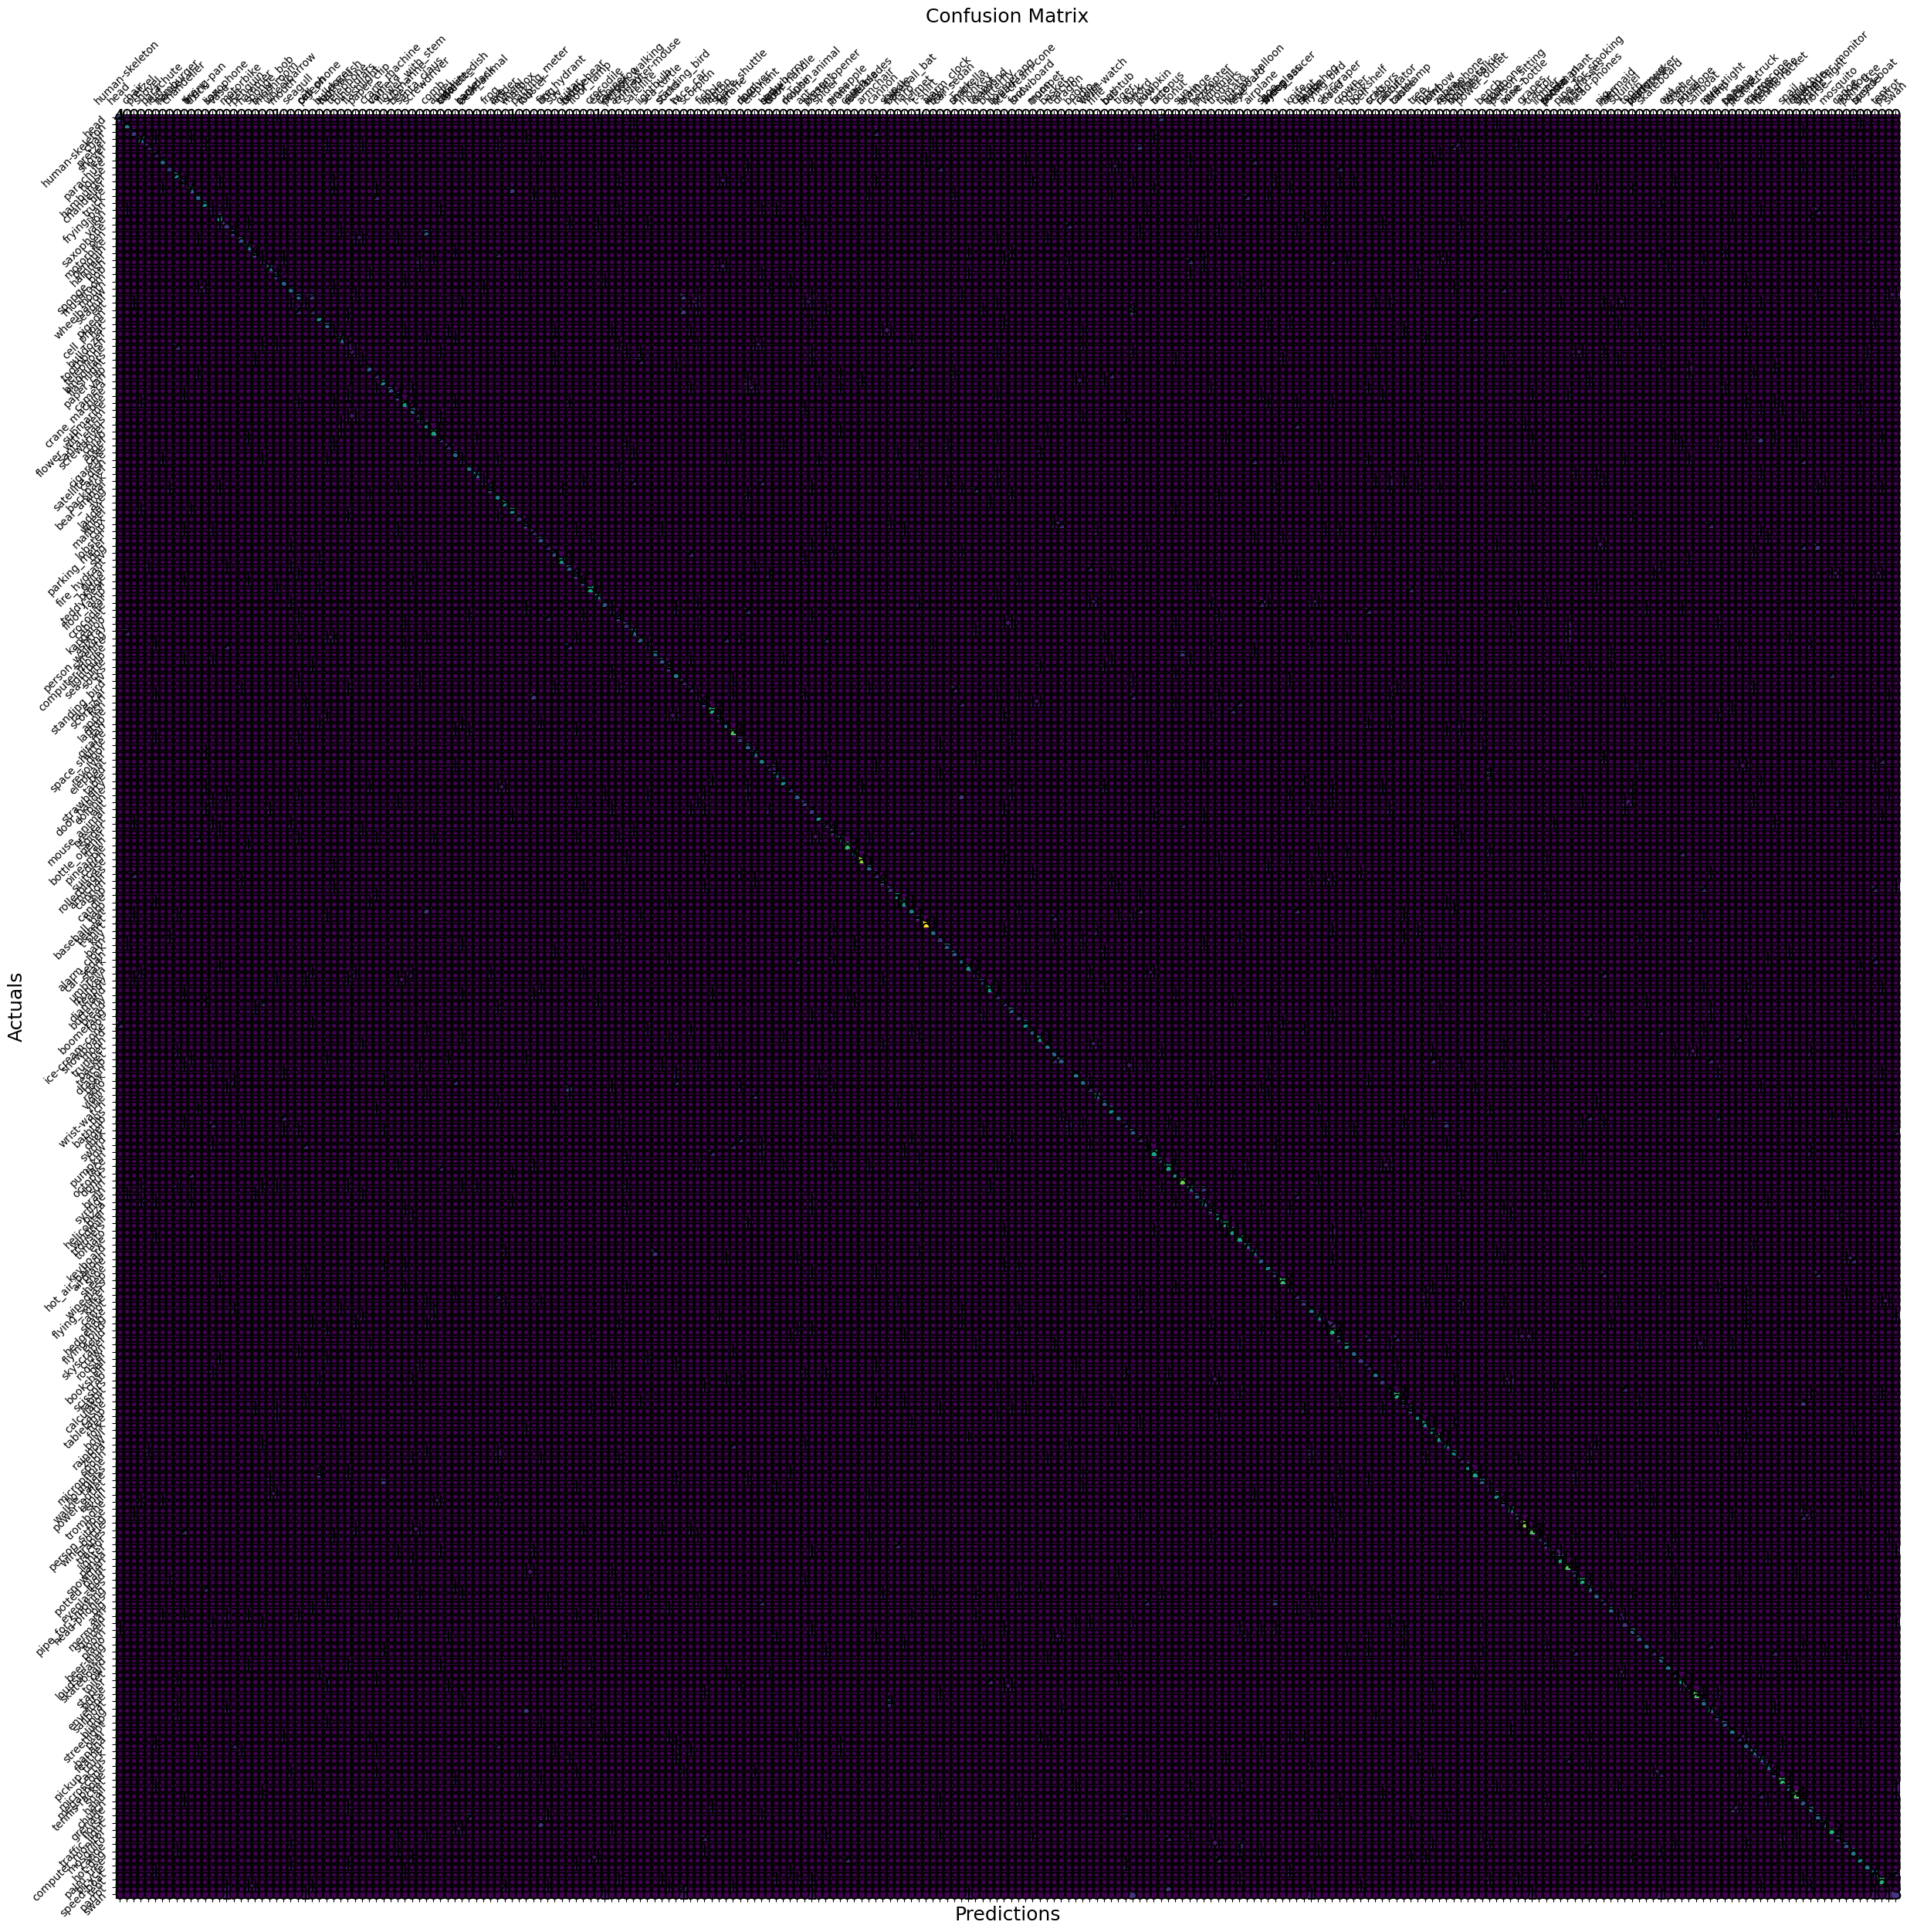

In [43]:
fig, ax = plt.subplots(figsize=(30, 30))

ax.matshow(mc_simple)
for i in range(mc_simple.shape[0]):
    for j in range(mc_simple.shape[1]):
        ax.text(
            x=j,
            y=i,
            s=round(mc_simple[i, j], 2),
            va="center",
            ha="center",
            size="xx-large",
        )
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.xticks(range(NUM_CLASSES), labels=classes.values(), rotation=45)
plt.yticks(range(NUM_CLASSES), labels=classes.values(), rotation=45)
plt.show()


# <a id='toc7_'></a>[ResNet-18](#toc0_)


## <a id='toc7_1_'></a>[Build & Compile](#toc0_)


In [44]:
block_sizes = [2, 2, 2, 2]
filters = [64, 128, 256, 512]
model_resnet = resnet.ResNet(block_sizes, filters, NUM_CLASSES)
input_shape = (BATCH_SIZE, 128, 128, 1)
model_resnet.build(input_shape=input_shape)
model_resnet.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.CategoricalAccuracy()],
)
model_resnet.summary()


Model: "res_net_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 backbone (ResNetBackbone)   multiple                  11176256  
                                                                 
 global_average_pooling2d_1   multiple                 0         
 (GlobalAveragePooling2D)                                        
                                                                 
 classifier (Dense)          multiple                  128250    
                                                                 
Total params: 11,304,506
Trainable params: 11,296,698
Non-trainable params: 7,808
_________________________________________________________________


## <a id='toc7_2_'></a>[Train](#toc0_)


In [45]:
history = model_resnet.fit(
    train_generator, epochs=EPOCHS, validation_data=validation_generator
)


Epoch 1/50
200/200 [==============================] - 27s 88ms/step - loss: 4.6228 - categorical_accuracy: 0.0691 - val_loss: 15.2054 - val_categorical_accuracy: 0.0056
Epoch 2/50
200/200 [==============================] - 17s 87ms/step - loss: 3.5504 - categorical_accuracy: 0.1935 - val_loss: 10.5144 - val_categorical_accuracy: 0.0066
Epoch 3/50
200/200 [==============================] - 20s 100ms/step - loss: 2.8195 - categorical_accuracy: 0.3275 - val_loss: 5.1816 - val_categorical_accuracy: 0.0831
Epoch 4/50
200/200 [==============================] - 17s 86ms/step - loss: 2.2868 - categorical_accuracy: 0.4287 - val_loss: 4.2083 - val_categorical_accuracy: 0.1691
Epoch 5/50
200/200 [==============================] - 17s 86ms/step - loss: 1.8525 - categorical_accuracy: 0.5176 - val_loss: 5.6215 - val_categorical_accuracy: 0.1141
Epoch 6/50
200/200 [==============================] - 17s 86ms/step - loss: 1.4920 - categorical_accuracy: 0.5983 - val_loss: 5.5013 - val_categorical_accura

## <a id='toc7_3_'></a>[Test](#toc0_)


In [46]:
datagen_kwargs = dict(rescale=1.0 / 255, validation_split=0)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)

test_generator = train_datagen.flow_from_dataframe(
    df_test,
    x_col="images",
    y_col="labels",
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=None,
    subset="training",
    classes=list(classes.values()),  # explicitly specify the order of classes
)

Found 3200 validated image filenames belonging to 250 classes.


## <a id='toc7_4_'></a>[Confusion Matrix](#toc0_)


In [47]:
# prediction using directly the trained model
# there is also a function called -- predict -- , you can check it
mc_resnet = 0
for batch in range(len(test_generator)):
    imgs = test_generator[batch][0]

    y_true = test_generator[batch][1]
    y_pred = model_resnet(imgs, training=False)

    # computing confusion_matrix
    mc_resnet += metrics.confusion_matrix(y_true, y_pred, NUM_CLASSES)
# model_file = 'simple_model'
# model_file = 'resnet_model'
# model.save(model_file)
# print('model was saved at {}'.format(model_file))
# print mc
print(mc_resnet)
# mc as percentages
rmc = mc_resnet.astype(np.float32) / np.sum(mc_resnet, axis=1, keepdims=True)
rmc = (rmc * 100).astype(np.int32) / 100

print(rmc)

[[ 4  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  4  0]
 [ 0  0  0 ...  0  0  5]]
[[0.36 0.   0.   ... 0.   0.   0.  ]
 [0.   0.54 0.   ... 0.   0.   0.  ]
 [0.   0.   0.66 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.52 0.   0.  ]
 [0.   0.   0.   ... 0.   0.25 0.  ]
 [0.   0.   0.   ... 0.   0.   0.29]]


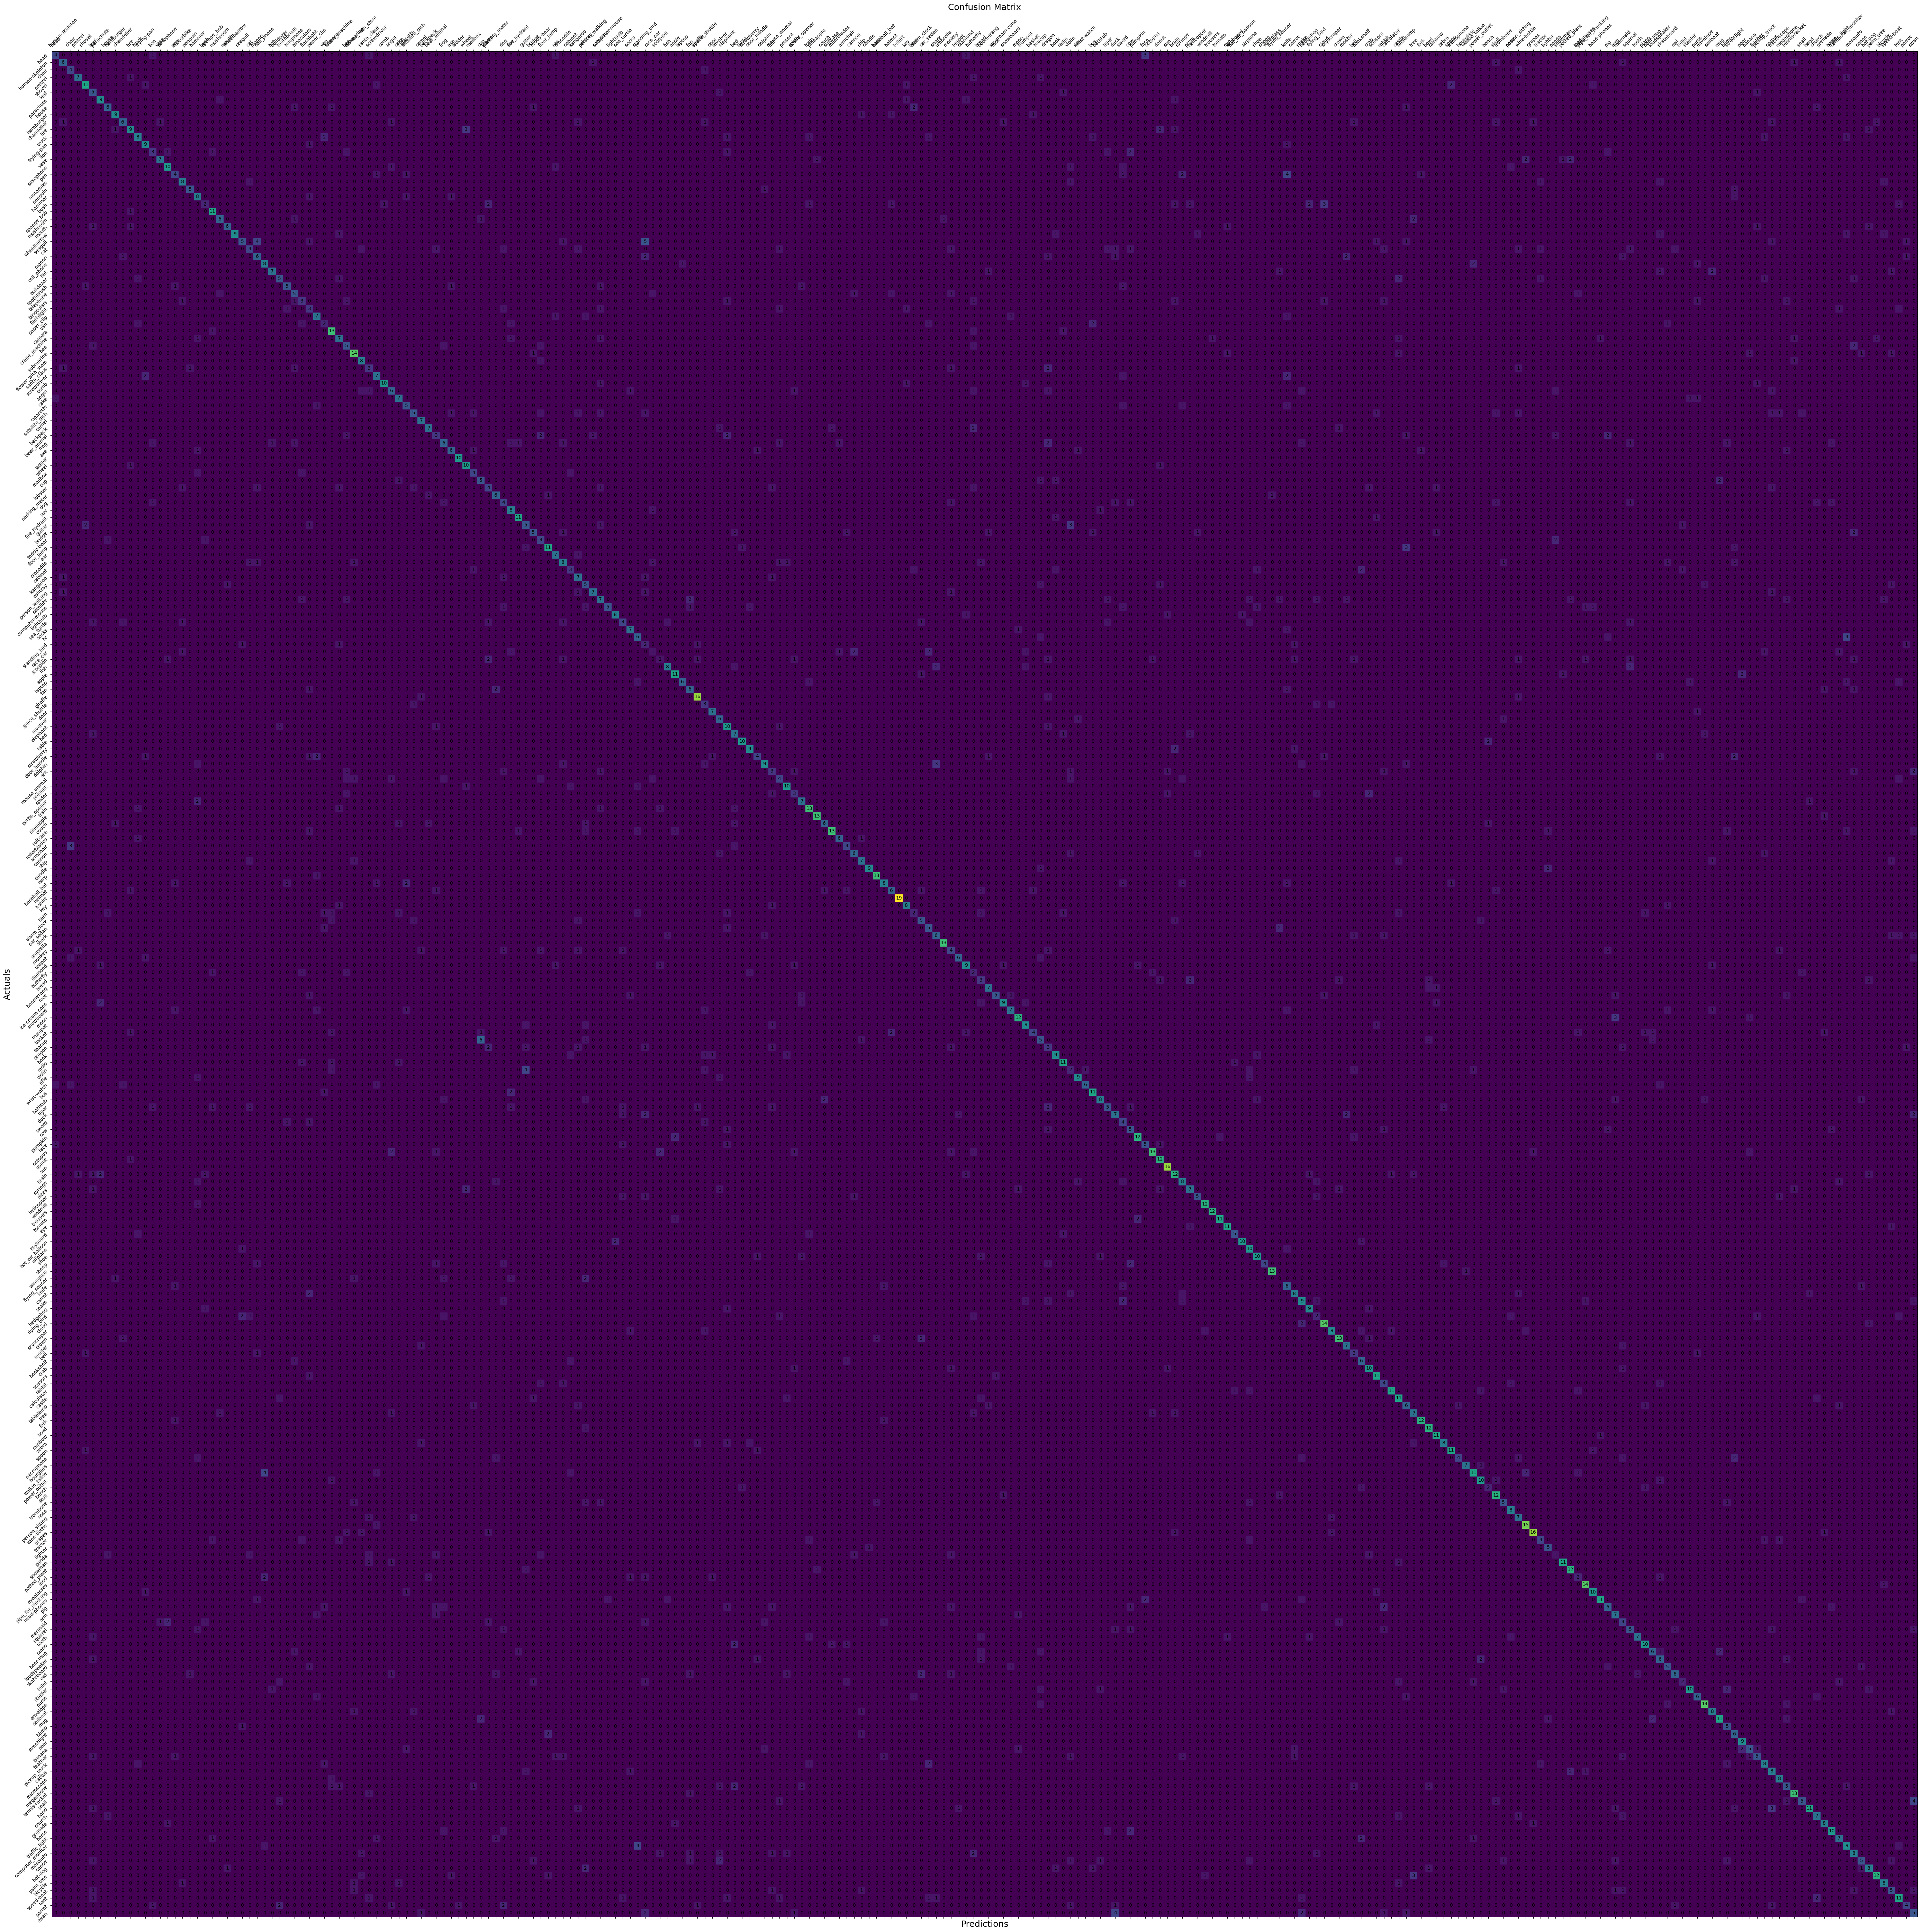

In [48]:
fig, ax = plt.subplots(figsize=(70, 70))
ax.matshow(mc_resnet)
for i in range(mc_resnet.shape[0]):
    for j in range(mc_resnet.shape[1]):
        ax.text(x=j, y=i, s=round(mc_resnet[i, j], 2), va="center", ha="center")
plt.xlabel("Predictions", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.xticks(range(NUM_CLASSES), labels=classes.values(), rotation=45)
plt.yticks(range(NUM_CLASSES), labels=classes.values(), rotation=45)
plt.show()

# <a id='toc8_'></a>[Graphs](#toc0_)


In [49]:
acc_simple = history_simple.history["categorical_accuracy"]
val_acc_simple = history_simple.history["val_categorical_accuracy"]
loss_simple = history_simple.history["loss"]
val_loss_simple = history_simple.history["val_loss"]
acc_resnet = history.history["categorical_accuracy"]
val_acc_resnet = history.history["val_categorical_accuracy"]
loss_resnet = history.history["loss"]
val_loss_resnet = history.history["val_loss"]
epochs = range(1, EPOCHS + 1)

## <a id='toc8_1_'></a>[Epochs vs Loss](#toc0_)


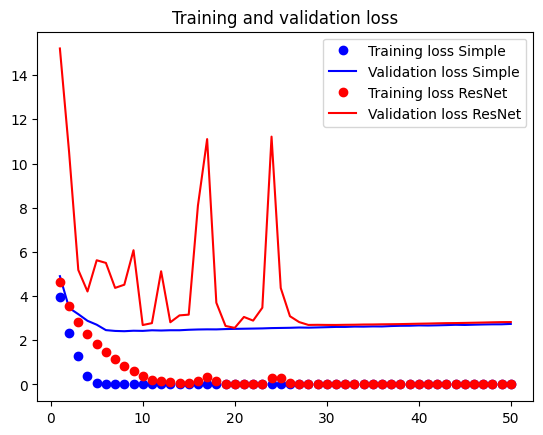

In [50]:
plt.plot(epochs, loss_simple, "bo", label="Training loss Simple")
plt.plot(epochs, val_loss_simple, "b", label="Validation loss Simple")
plt.plot(epochs, loss_resnet, "ro", label="Training loss ResNet")
plt.plot(epochs, val_loss_resnet, "r", label="Validation loss ResNet")
plt.title("Training and validation loss")
plt.legend()
plt.show()

## <a id='toc8_2_'></a>[Epochs vs Accuracy](#toc0_)


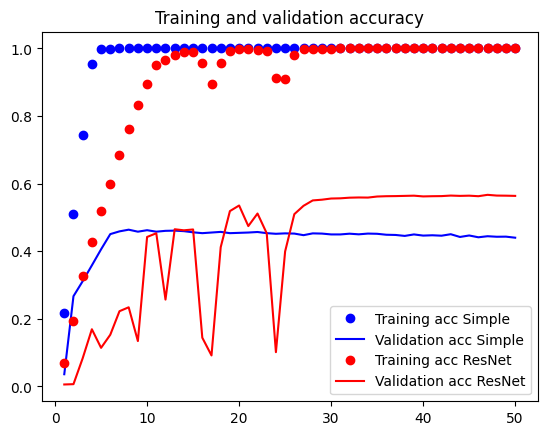

In [51]:
plt.plot(epochs, acc_simple, "bo", label="Training acc Simple")
plt.plot(epochs, val_acc_simple, "b", label="Validation acc Simple")
plt.plot(epochs, acc_resnet, "ro", label="Training acc ResNet")
plt.plot(epochs, val_acc_resnet, "r", label="Validation acc ResNet")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

### <a id='toc8_2_1_'></a>[Accuracy](#toc0_)


### <a id='toc8_2_2_'></a>[Total](#toc0_)


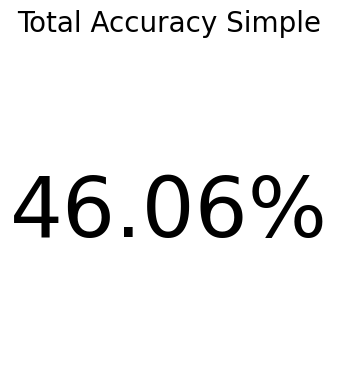

In [52]:
# Calculate total accuracy from confusion matrix
total_correct = np.trace(mc_simple)
total_samples = np.sum(mc_simple)
total_accuracy = total_correct / total_samples * 100

# Plotting
plt.figure(figsize=(4, 4))
plt.text(0.5, 0.5, f"{total_accuracy:.2f}%", ha="center", va="center", fontsize=60)
plt.axis("off")
plt.title("Total Accuracy Simple", pad=20, fontsize=20)
plt.show()

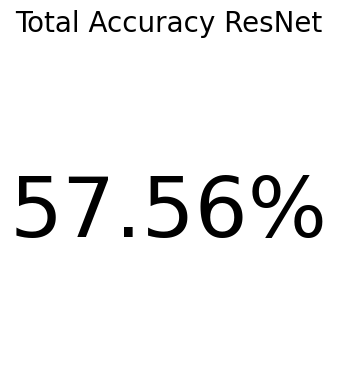

In [53]:
# Calculate total accuracy from confusion matrix
total_correct = np.trace(mc_resnet)
total_samples = np.sum(mc_resnet)
total_accuracy = total_correct / total_samples * 100

# Plotting
plt.figure(figsize=(4, 4))
plt.text(0.5, 0.5, f"{total_accuracy:.2f}%", ha="center", va="center", fontsize=60)
plt.axis("off")
plt.title("Total Accuracy ResNet", pad=20, fontsize=20)
plt.show()

### <a id='toc8_2_3_'></a>[By Class](#toc0_)


#### <a id='toc8_2_3_1_'></a>[Simple](#toc0_)


##### <a id='toc8_2_3_1_1_'></a>[Class wise accuracy](#toc0_)


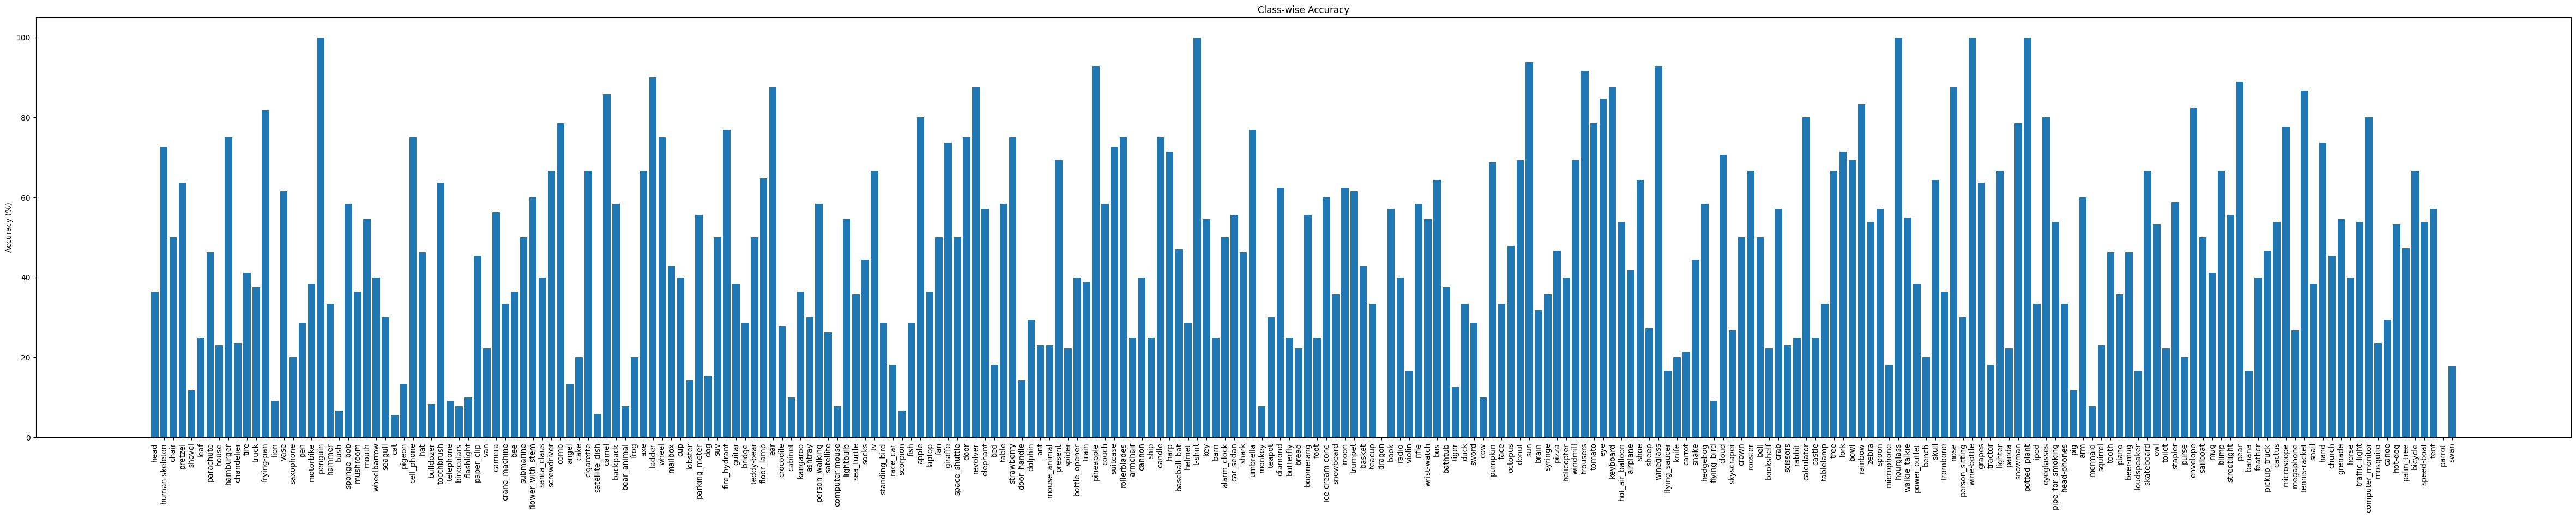

In [54]:
# Calculate class-wise accuracy
class_wise_accuracy = np.diag(mc_simple) / np.sum(mc_simple, axis=1) * 100

# Plotting
plt.figure(figsize=(60, 10))
plt.bar(range(NUM_CLASSES), class_wise_accuracy)
plt.xticks(range(NUM_CLASSES), labels=classes.values(), rotation=90)
plt.ylabel("Accuracy (%)")
plt.title("Class-wise Accuracy")
plt.show()

##### <a id='toc8_2_3_1_2_'></a>[Top 10 most and least accurate classes](#toc0_)


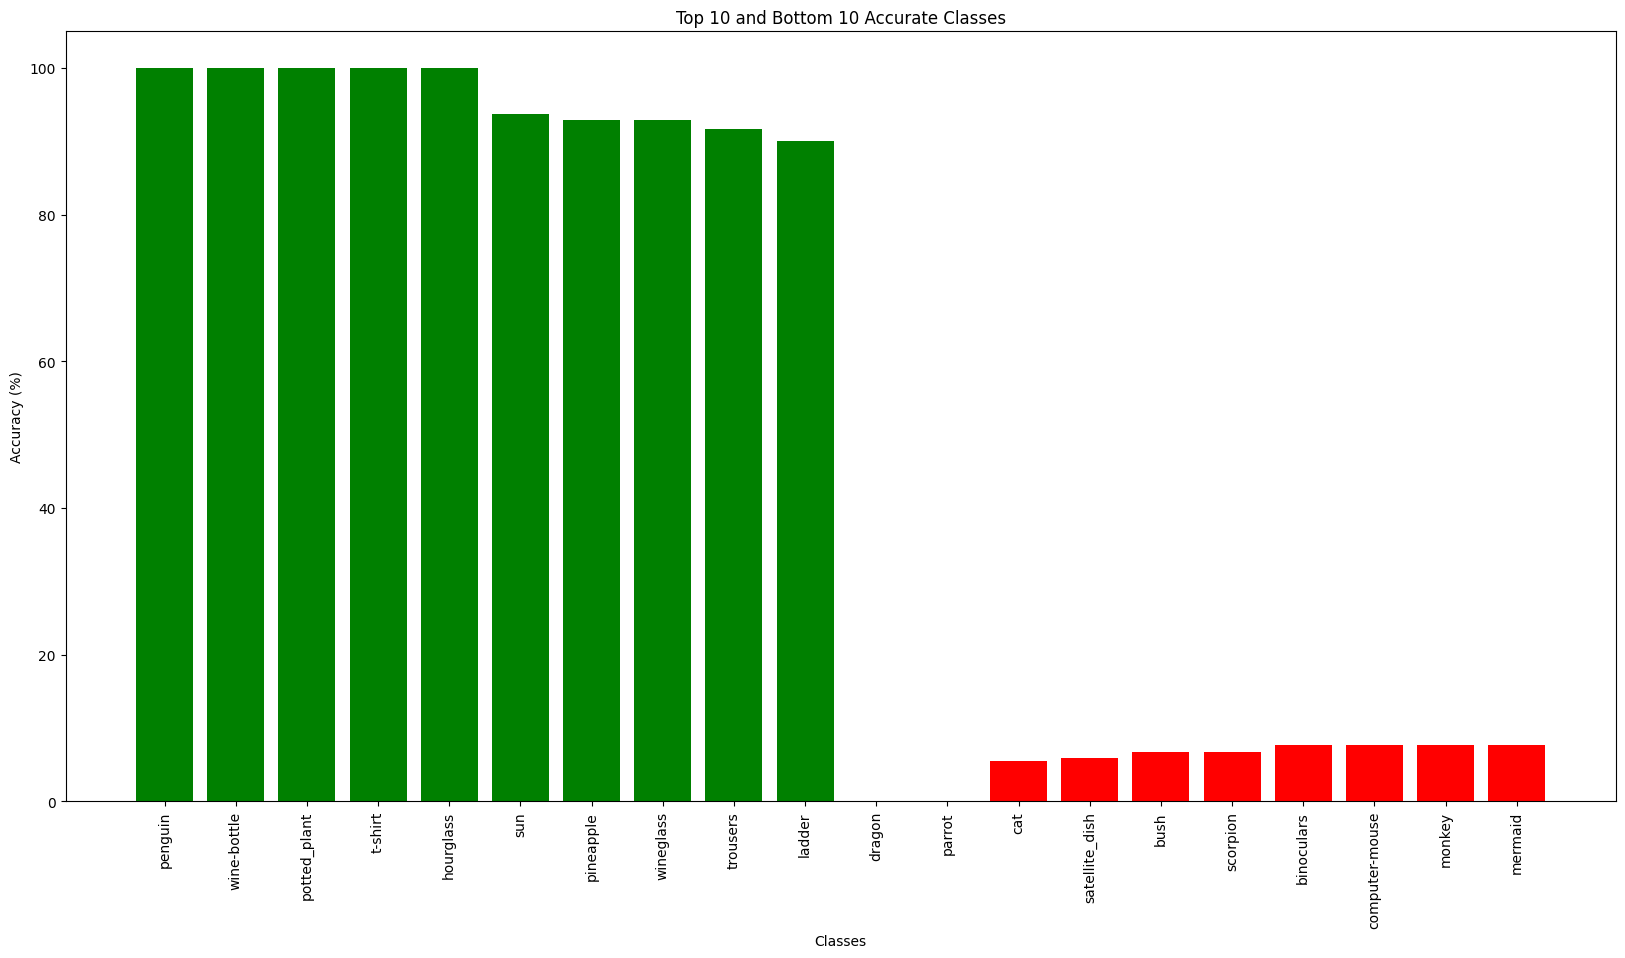

In [55]:
# Calculate class-wise accuracy
class_wise_accuracy = np.diag(mc_simple) / np.sum(mc_simple, axis=1) * 100

# Sort the accuracies and get the indices
sorted_indices = np.argsort(class_wise_accuracy)

# Get the top 10 and bottom 10 indices
top_10_indices = sorted_indices[-10:][::-1]  # Reverse to get the highest first
bottom_10_indices = sorted_indices[:10]

# Get the class names and accuracies for top 10 and bottom 10
top_10_classes = [classes[i] for i in top_10_indices]
top_10_accuracies = class_wise_accuracy[top_10_indices]

bottom_10_classes = [classes[i] for i in bottom_10_indices]
bottom_10_accuracies = class_wise_accuracy[bottom_10_indices]

# Combine top 10 and bottom 10 for plotting
all_classes = top_10_classes + bottom_10_classes
all_accuracies = np.concatenate([top_10_accuracies, bottom_10_accuracies])

# Plotting
plt.figure(figsize=(20, 10))

# Use different colors for top 10 and bottom 10
colors = ["green"] * 10 + ["red"] * 10

plt.bar(all_classes, all_accuracies, color=colors)
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Accuracy (%)")
plt.title("Top 10 and Bottom 10 Accurate Classes")
plt.show()

#### <a id='toc8_2_3_2_'></a>[ResNet](#toc0_)


##### <a id='toc8_2_3_2_1_'></a>[Class wise accuracy](#toc0_)


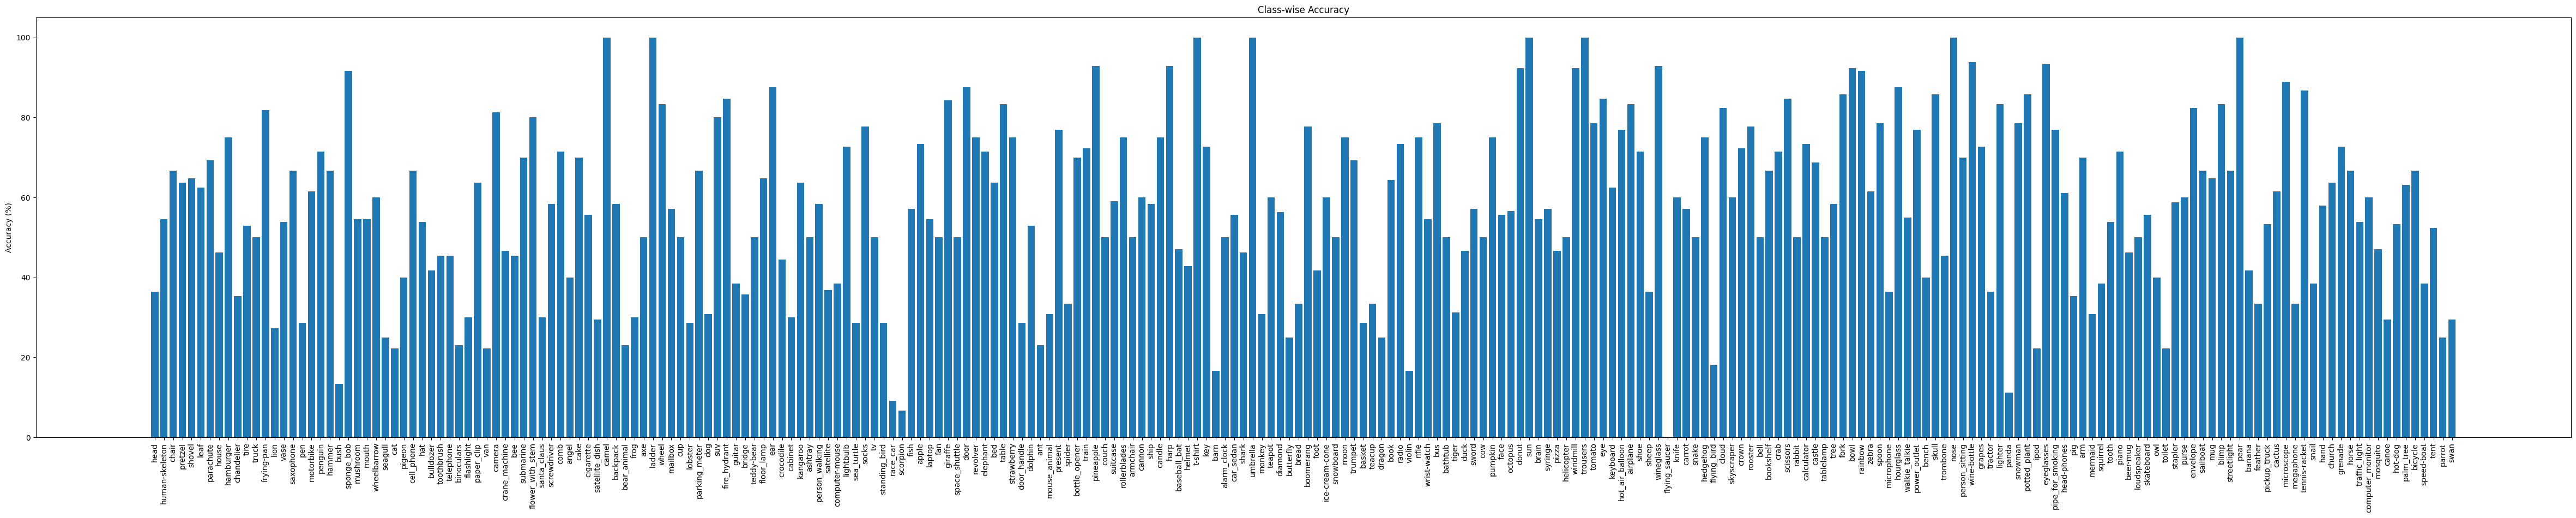

In [56]:
# Calculate class-wise accuracy
class_wise_accuracy = np.diag(mc_resnet) / np.sum(mc_resnet, axis=1) * 100

# Plotting
plt.figure(figsize=(60, 10))
plt.bar(range(NUM_CLASSES), class_wise_accuracy)
plt.xticks(range(NUM_CLASSES), labels=classes.values(), rotation=90)
plt.ylabel("Accuracy (%)")
plt.title("Class-wise Accuracy")
plt.show()

##### <a id='toc8_2_3_2_2_'></a>[Top 10 most and least accurate classes](#toc0_)


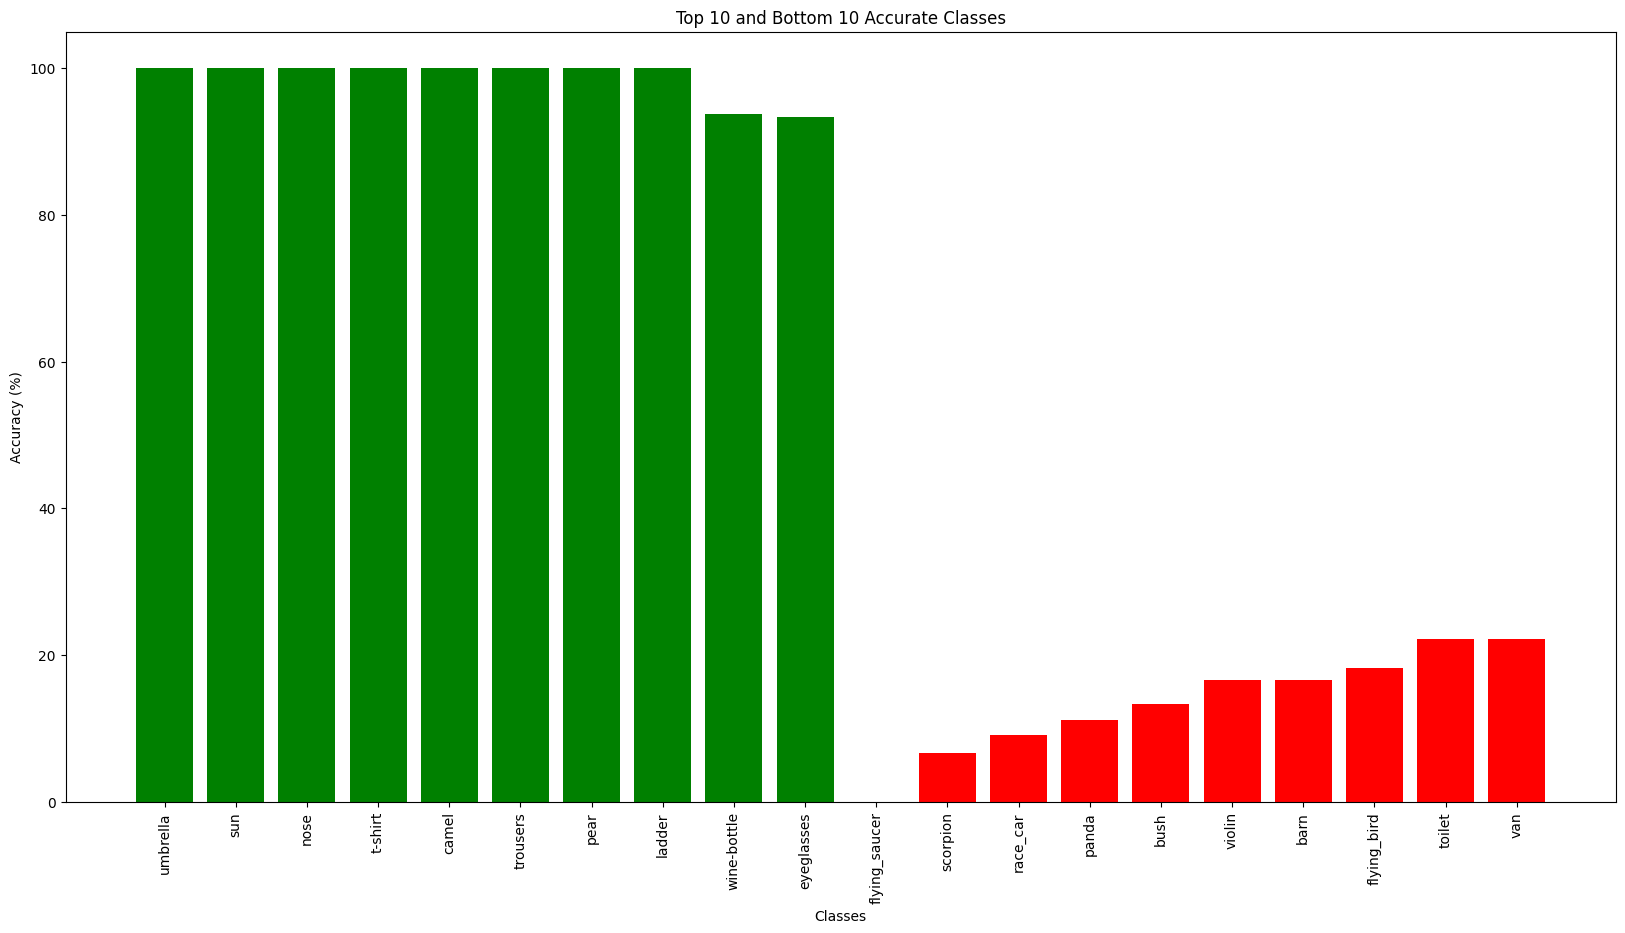

In [57]:
# Calculate class-wise accuracy
class_wise_accuracy = np.diag(mc_resnet) / np.sum(mc_resnet, axis=1) * 100

# Sort the accuracies and get the indices
sorted_indices = np.argsort(class_wise_accuracy)

# Get the top 10 and bottom 10 indices
top_10_indices = sorted_indices[-10:][::-1]  # Reverse to get the highest first
bottom_10_indices = sorted_indices[:10]

# Get the class names and accuracies for top 10 and bottom 10
top_10_classes = [classes[i] for i in top_10_indices]
top_10_accuracies = class_wise_accuracy[top_10_indices]

bottom_10_classes = [classes[i] for i in bottom_10_indices]
bottom_10_accuracies = class_wise_accuracy[bottom_10_indices]

# Combine top 10 and bottom 10 for plotting
all_classes = top_10_classes + bottom_10_classes
all_accuracies = np.concatenate([top_10_accuracies, bottom_10_accuracies])

# Plotting
plt.figure(figsize=(20, 10))

# Use different colors for top 10 and bottom 10
colors = ["green"] * 10 + ["red"] * 10

plt.bar(all_classes, all_accuracies, color=colors)
plt.xticks(rotation=90)
plt.xlabel("Classes")
plt.ylabel("Accuracy (%)")
plt.title("Top 10 and Bottom 10 Accurate Classes")
plt.show()

# <a id='toc9_'></a>[Predictions](#toc0_)


## <a id='toc9_1_'></a>[Simple](#toc0_)


Found 4000 validated image filenames belonging to 250 classes.
4000/4000 [==============================] - 13s 3ms/step


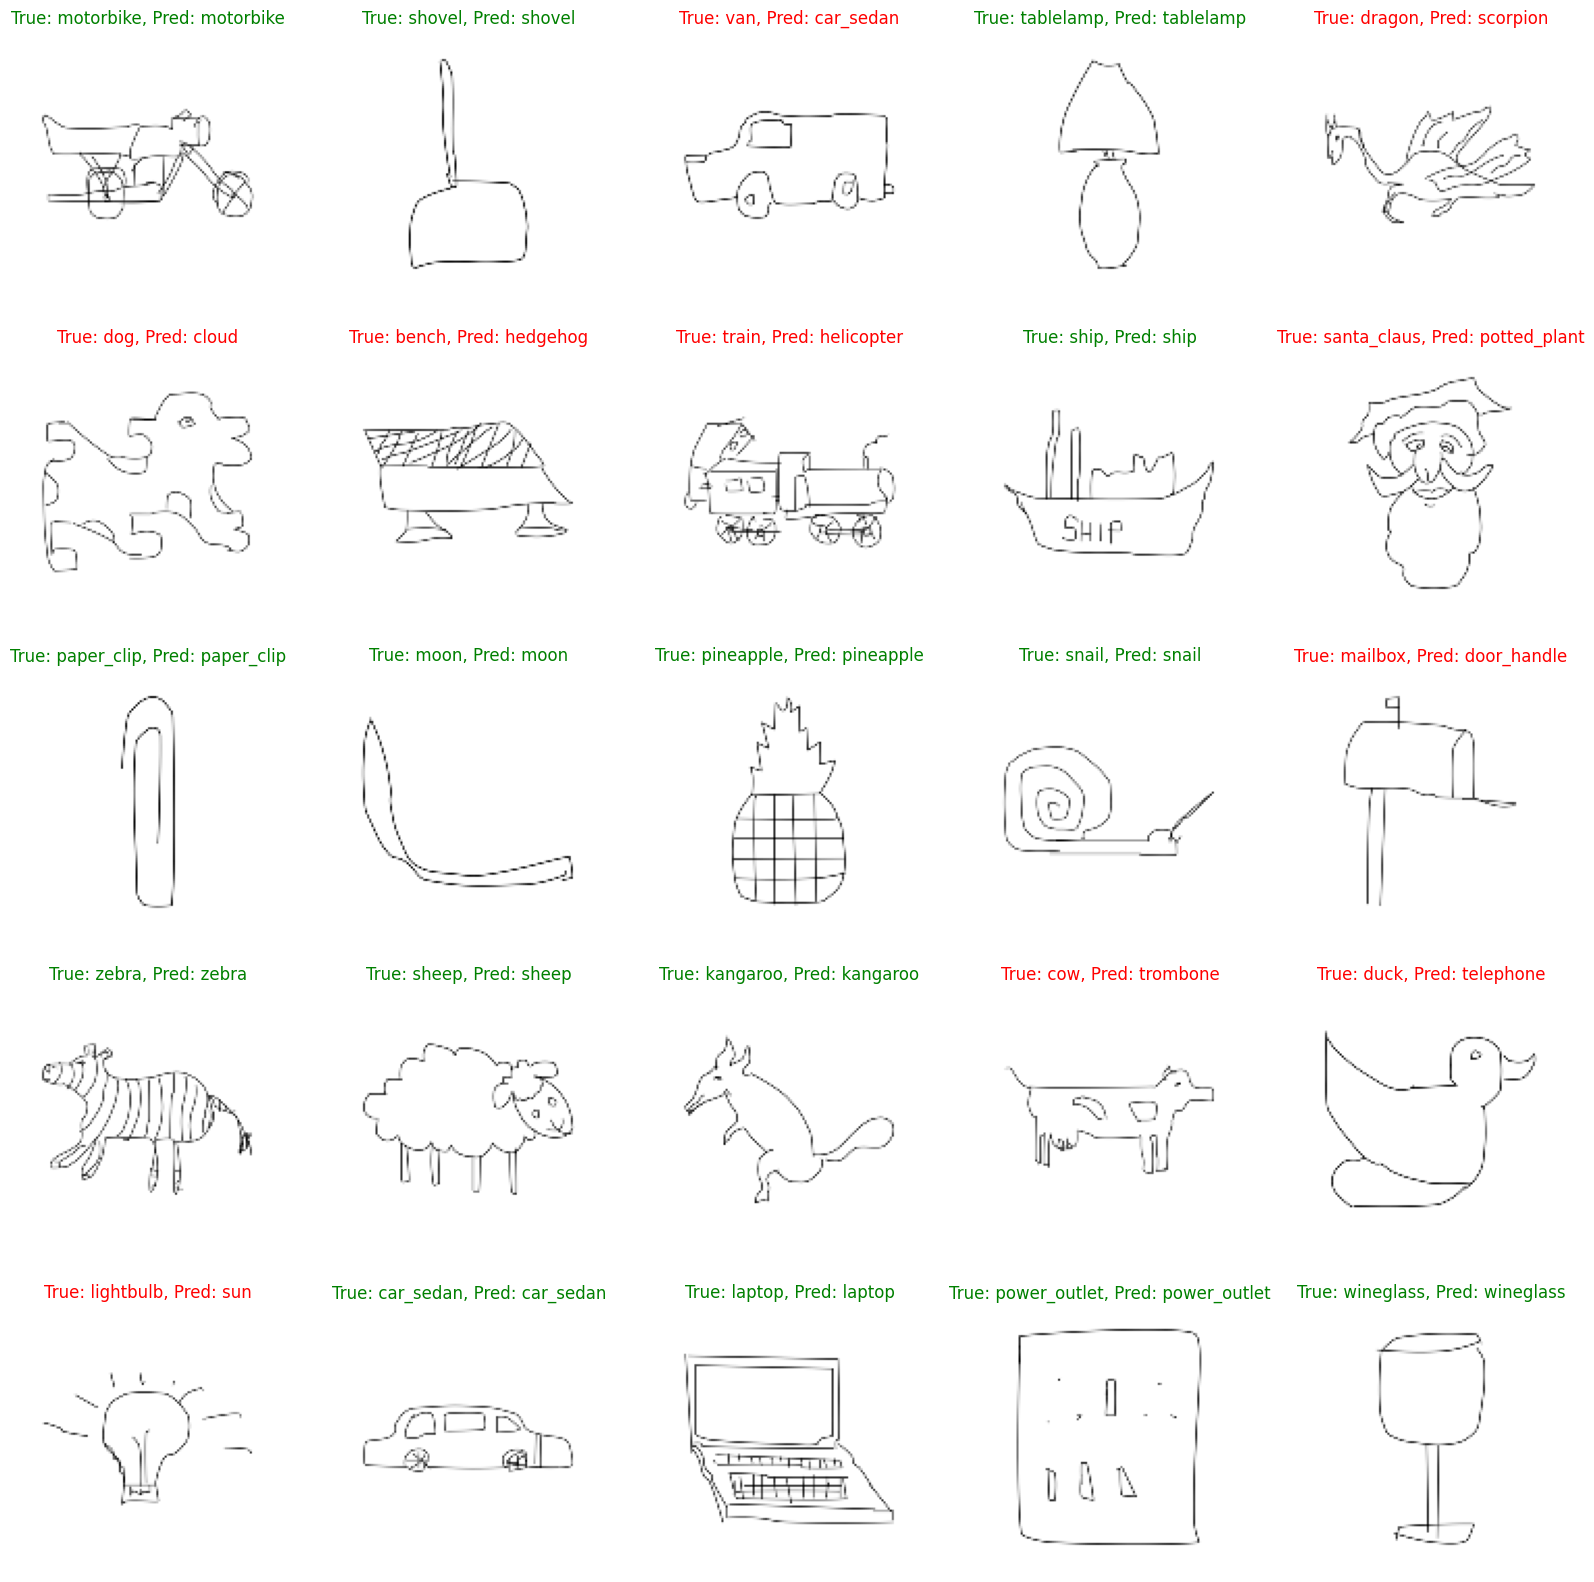

In [58]:
test_generator = train_datagen.flow_from_dataframe(
    df_test,
    x_col="images",
    y_col="labels",
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=1,
    shuffle=False,
    classes=list(classes.values()),  # explicitly specify the order of classes
)

# Make predictions on the test set
predictions = model_simple.predict(test_generator, steps=len(test_generator), verbose=1)

# Get the true labels from the generator
true_labels = test_generator.classes

# Convert the predictions to class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Initialize figure for displaying images
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

# Loop to display the first 5 images, true labels, and predicted labels
for i in range(5):
    for j in range(5):
        test_generator.reset()
        index = i * 5 + j
        # Get the image and true label
        img, true_label = test_generator[index]
        img = np.squeeze(img)
        true_label = np.argmax(true_label)

        # Get the corresponding predicted label
        pred_label = predicted_class_indices[index]

        # Display the image, true label, and predicted label
        axes[i][j].imshow(img, cmap="gray")
        if classes[true_label] == classes[pred_label]:
            title_color = "green"
        else:
            title_color = "red"
        axes[i][j].set_title(
            f"True: {classes[true_label]}, Pred: {classes[pred_label]}",
            color=title_color,
        )
        axes[i][j].axis("off")

plt.show()

## <a id='toc9_2_'></a>[ResNet](#toc0_)


Found 4000 validated image filenames belonging to 250 classes.
4000/4000 [==============================] - 20s 5ms/step


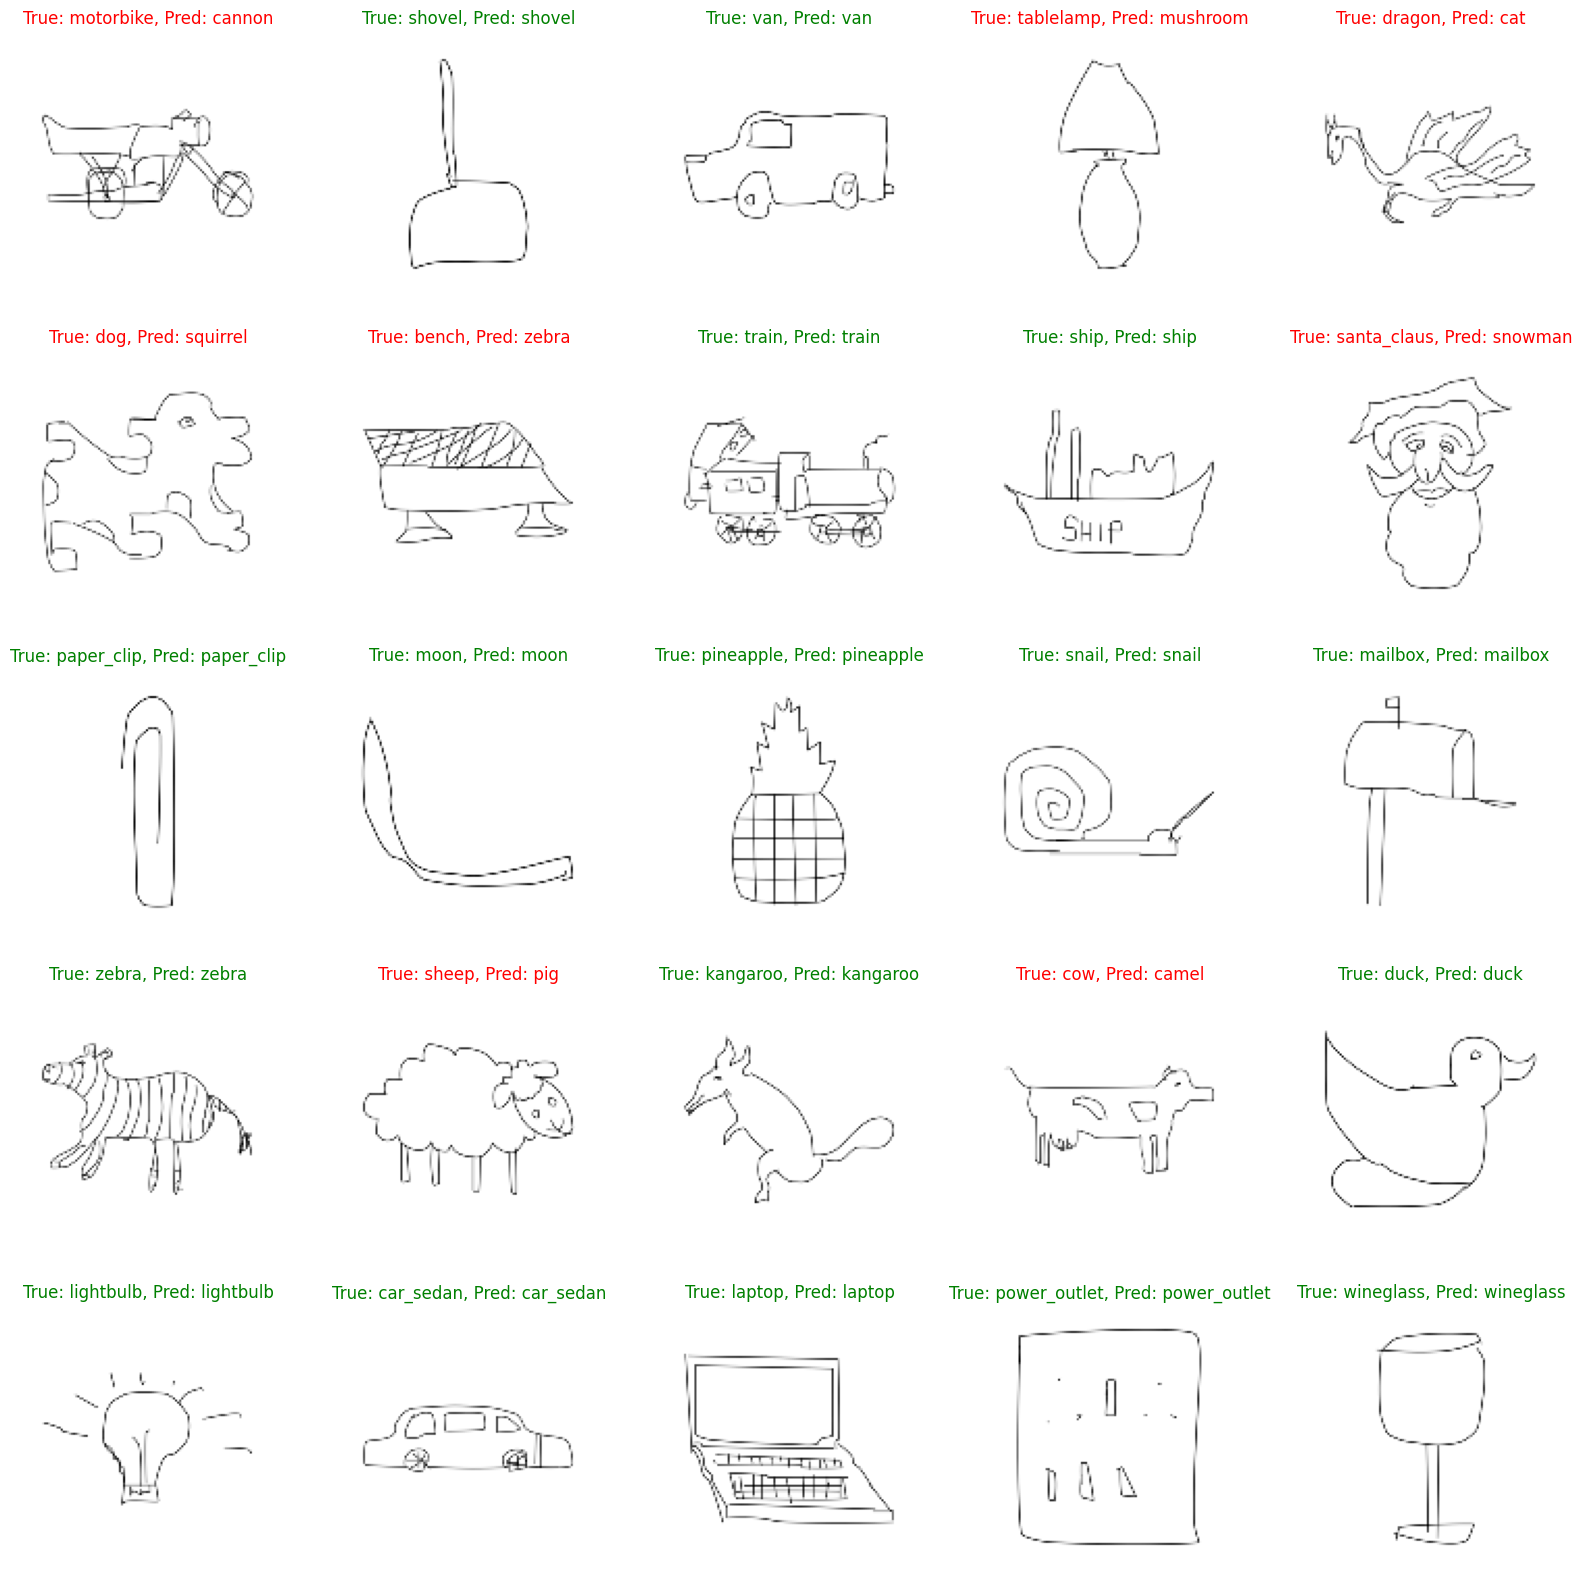

In [59]:
test_generator = train_datagen.flow_from_dataframe(
    df_test,
    x_col="images",
    y_col="labels",
    target_size=IMAGE_SIZE,
    color_mode="grayscale",
    class_mode="categorical",
    batch_size=1,
    shuffle=False,
    classes=list(classes.values()),  # explicitly specify the order of classes
)

# Make predictions on the test set
predictions = model_resnet.predict(test_generator, steps=len(test_generator), verbose=1)

# Get the true labels from the generator
# true_labels = test_generator.classes

# TEST
true_labels = []

for i in range(len(test_generator)):
    _, label = test_generator[i]
    true_labels.append(np.argmax(label))
# TEST

# Convert the predictions to class indices
predicted_class_indices = np.argmax(predictions, axis=1)

# Initialize figure for displaying images
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

# Loop to display the first 5 images, true labels, and predicted labels
for i in range(5):
    for j in range(5):
        test_generator.reset()
        index = i * 5 + j
        # Get the image and true label
        img, true_label = test_generator[index]
        img = np.squeeze(img)
        true_label = np.argmax(true_label)

        # Get the corresponding predicted label
        pred_label = predicted_class_indices[index]

        # Display the image, true label, and predicted label
        axes[i][j].imshow(img, cmap="gray")
        if classes[true_label] == classes[pred_label]:
            title_color = "green"
        else:
            title_color = "red"
        axes[i][j].set_title(
            f"True: {classes[true_label]}, Pred: {classes[pred_label]}",
            color=title_color,
        )
        axes[i][j].axis("off")

plt.show()